# Build Your Own Neural Network from Scratch

Welcome! This notebook demonstrates how to build and train a neural network using a **modular architecture**. 

### Why Modular?
In real-world frameworks like PyTorch or TensorFlow, neural networks are built by stacking independent components (Layers). This modularity allows us to:
1. **Understand** each part in isolation (Linear, Activation, Loss).
2. **Customize** the architecture easily (add more layers, change sizes).
3. **Debug** specific components during the backward pass.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

# Fix for ModuleNotFoundError in some environments
sys.path.append(os.path.abspath("."))
from neural_network import Linear, ReLU, Sequential, CrossEntropyLoss, SGD

np.random.seed(42)

def load_data(n_samples=2000, n_features=4, centers=3):
    """Generates synthetic data (blobs) for classification."""
    X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=n_features, random_state=42)
    y_oh = np.eye(centers)[y] # One-hot encode targets
    X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, centers

X_train, X_test, y_train, y_test, num_classes = load_data()
print(f"Data loaded: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples.")

Data loaded: 1600 training samples, 400 test samples.


## 1. Design Your Network

Here you can customize the **important parameters**:
- `hidden_dim`: Number of neurons in the hidden layer (try 8, 32, or 128).
- `learning_rate`: How fast the model learns (try 0.1, 0.01, or 0.001).
- `regularization`: Prevents overfitting (try 1e-4).

In [3]:
# --- CUSTOMIZE THESE PARAMETERS ---
HIDDEN_DIM = 64
LEARNING_RATE = 0.1
REGULARIZATION = 1e-4
EPOCHS = 100
BATCH_SIZE = 32
# ----------------------------------

input_dim = X_train.shape[1]
output_dim = num_classes

# Build the model
model = Sequential([
    Linear(input_dim, HIDDEN_DIM),
    ReLU(),
    Linear(HIDDEN_DIM, output_dim)
])

loss_fn = CrossEntropyLoss()
optimizer = SGD(model.layers, lr=LEARNING_RATE, reg=REGULARIZATION)

print(f"Model built with {HIDDEN_DIM} hidden units.")

Model built with 64 hidden units.


## 2. The Training Loop

This is where the "learning" happens in 3 steps:
1. **Forward**: Data passes through layers to get predictions.
2. **Loss**: Measure how far off we are from the truth.
3. **Backward**: Calculate gradients and use SGD to update weights.

Epoch 10/100 | Loss: 0.0004 | Train Acc: 1.000 | Test Acc: 1.000
Epoch 20/100 | Loss: 0.0002 | Train Acc: 1.000 | Test Acc: 1.000
Epoch 30/100 | Loss: 0.0001 | Train Acc: 1.000 | Test Acc: 1.000
Epoch 40/100 | Loss: 0.0001 | Train Acc: 1.000 | Test Acc: 1.000
Epoch 50/100 | Loss: 0.0001 | Train Acc: 1.000 | Test Acc: 1.000
Epoch 60/100 | Loss: 0.0001 | Train Acc: 1.000 | Test Acc: 1.000
Epoch 70/100 | Loss: 0.0001 | Train Acc: 1.000 | Test Acc: 1.000
Epoch 80/100 | Loss: 0.0001 | Train Acc: 1.000 | Test Acc: 1.000
Epoch 90/100 | Loss: 0.0000 | Train Acc: 1.000 | Test Acc: 1.000
Epoch 100/100 | Loss: 0.0000 | Train Acc: 1.000 | Test Acc: 1.000


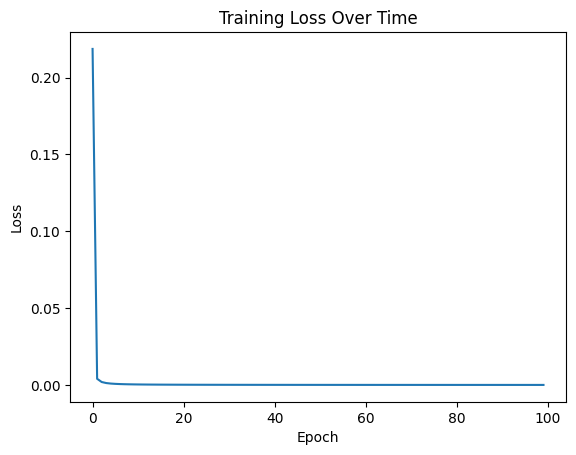

In [4]:
def calculate_accuracy(model, X, y):
    scores = model.forward(X)
    preds = np.argmax(scores, axis=1)
    targets = np.argmax(y, axis=1)
    return np.mean(preds == targets)

losses = []
N = X_train.shape[0]

for epoch in range(1, EPOCHS + 1):
    # Shuffle data for each epoch
    indices = np.random.permutation(N)
    X_shuffled = X_train[indices]
    y_shuffled = y_train[indices]
    
    epoch_loss = 0
    for i in range(0, N, BATCH_SIZE):
        xb = X_shuffled[i:i+BATCH_SIZE]
        yb = y_shuffled[i:i+BATCH_SIZE]
        
        # 1. Forward pass
        scores = model.forward(xb)
        
        # 2. Compute Loss
        loss = loss_fn.loss(scores, yb)
        epoch_loss += loss
        
        # 3. Backward pass (Gradients)
        dloss = loss_fn.backward(yb)
        model.backward(dloss)
        
        # 4. Optimization step
        optimizer.step()
        
    avg_loss = epoch_loss / (N / BATCH_SIZE)
    losses.append(avg_loss)
    
    if epoch % 10 == 0:
        train_acc = calculate_accuracy(model, X_train, y_train)
        test_acc = calculate_accuracy(model, X_test, y_test)
        print(f"Epoch {epoch}/{EPOCHS} | Loss: {avg_loss:.4f} | Train Acc: {train_acc:.3f} | Test Acc: {test_acc:.3f}")

plt.plot(losses)
plt.title("Training Loss Over Time")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## 3. Visualize Predictions

Let's see how our model performs visually by plotting the decision boundaries (if possible) or just checking a few random samples.

In [5]:
sample_idx = np.random.randint(0, X_test.shape[0], 5)
for idx in sample_idx:
    x = X_test[idx:idx+1]
    y = y_test[idx]
    scores = model.forward(x)
    pred = np.argmax(scores)
    actual = np.argmax(y)
    print(f"Sample {idx}: Prediction={pred}, Actual={actual} {'✅' if pred == actual else '❌'}")

Sample 392: Prediction=2, Actual=2 ✅
Sample 269: Prediction=1, Actual=1 ✅
Sample 55: Prediction=2, Actual=2 ✅
Sample 116: Prediction=0, Actual=0 ✅
Sample 122: Prediction=0, Actual=0 ✅
